## Import functions and define DFS method

In [5]:
import matplotlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


def DFS(array, row, col, directions) :
    
    direction = directions
    array[row, col] = 0
    for row_direction, col_direction in direction :
        
        new_row = row + row_direction
        new_col = col + col_direction

        #check neighbors and boundary
        if 0 <= new_row < array.shape[0] and 0 <= new_col < array.shape[1] and array[new_row, new_col] == 1 :
            DFS(array, new_row, new_col, direction)

## Build worlds

In [6]:
worlds = np.zeros((10,10))
island = worlds
worlds[1, 1:5] = 1
worlds[1, -2:] = 1
worlds[2, 2:5] = 1
worlds[2, 6:] = 1
worlds[3, 2:4] = 1
worlds[3, 6:] = 1
worlds[4, 1:4] = 1
worlds[4, 6:9] = 1
worlds[5, 8] = 1
worlds[6, 3:6] = 1
worlds[6, 8] = 1
worlds[7, 3:7] = 1
worlds[8, 3:7] = 1
worlds[9, 6] = 1
island = worlds.copy()

## DFS Method

In [7]:
count = 0
size = []
island_shape = []
direction = [(1, 0), (-1, 0), (0, 1), (0, -1)]

rows = worlds.shape[0]
columns = worlds.shape[1]

for row in range(rows):
    for col in range(columns):
        if worlds[row, col] == 1 :
            DFS(worlds, row, col, direction)
            size.append(np.sum(island) - np.sum(worlds))
            island_shape.append(island - worlds)
            island = worlds.copy()
            count = count + 1

## Visualize area

The total number of Islands in the world is 3

Ths size of island 1 is : 12


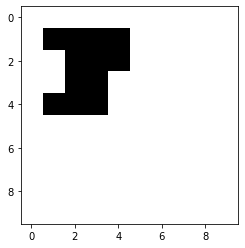


Ths size of island 2 is : 15


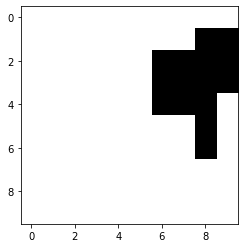


Ths size of island 3 is : 12


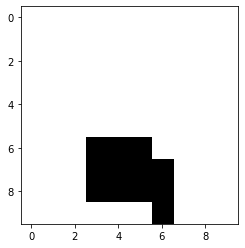

In [8]:
print('The total number of Islands in the world is %d' % count)
print()
for i in range(len(size)) :
    sizes = size[i]
    shape = island_shape[i] * 255
    new_shape = np.ones((shape.shape[0], shape.shape[1])) * 255
    island_image = new_shape - shape
    num = i + 1

    print('Ths size of island %d is : %d' % (num, sizes))
    plt.imshow(island_image, cmap=plt.cm.gray)
    plt.show()
    print()